In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn

from IPython.display import Image, display

parser = load_parser()

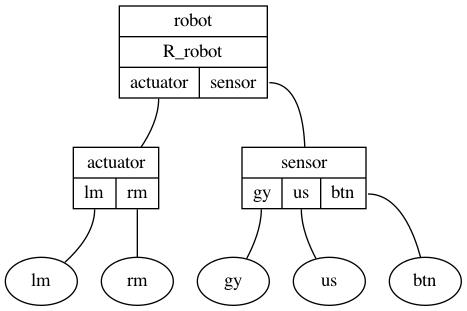

In [4]:
robot_hn = Hypernetwork()

compile_hn(robot_hn, parser, """
    robot=<actuator, sensor; R_robot>
        actuator=<lm, rm>
        sensor=<gy, us, btn>
""")

draw_hn(robot_hn, fname="/tmp/robot", view=True)
Image(filename='/tmp/robot.png', width=400, height=1200)

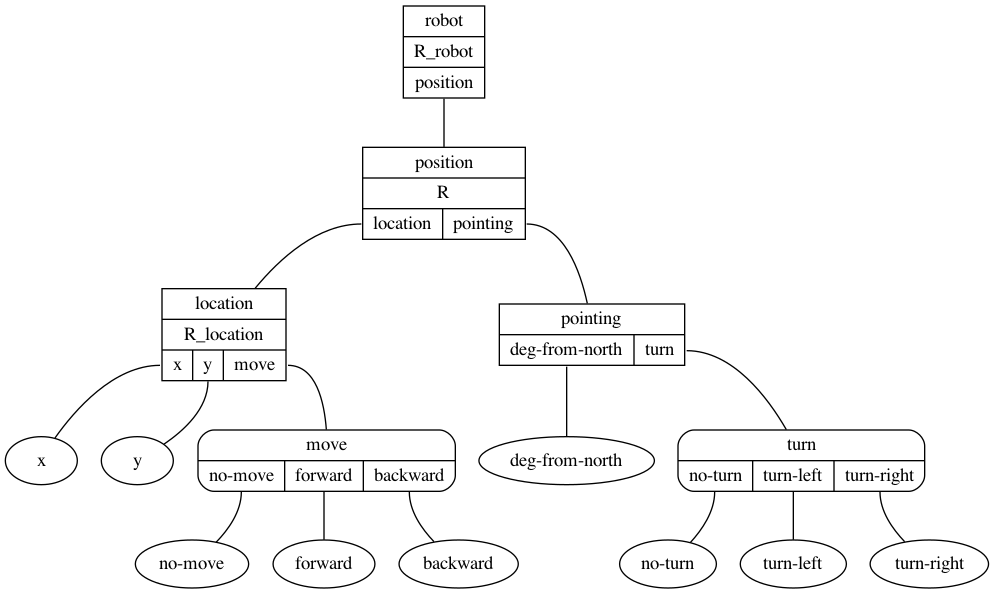

In [5]:
pos_hn = Hypernetwork()

compile_hn(pos_hn, parser, """
        robot=U<position; R_robot>
        position=<location, pointing; R>
#            deg-from-north=<pointing>
            pointing=<deg-from-north, turn>
                turn={no-turn, turn-left, turn-right}
            location=<x, y, move; R_location>
                move={no-move, forward, backward}
""")

draw_hn(pos_hn, fname="/tmp/robot-pos", view=True)
Image(filename='/tmp/robot-pos.png', width=800, height=1200)

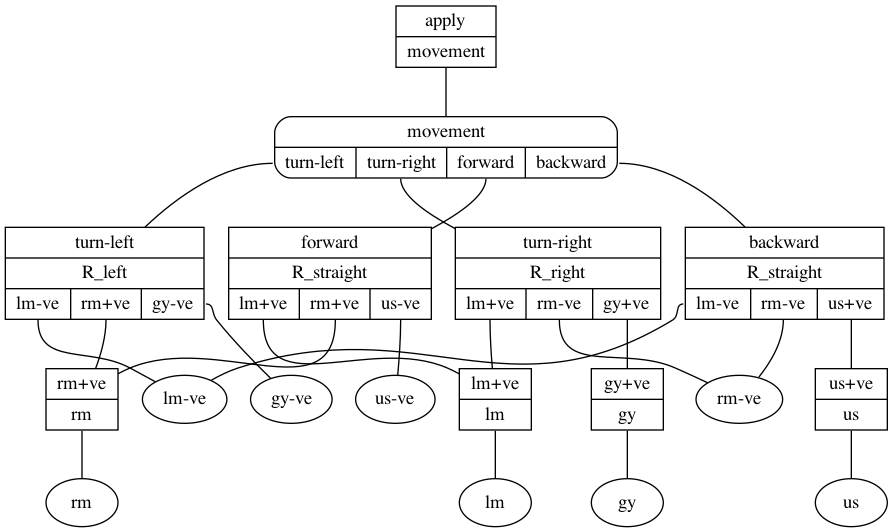

In [6]:
movement_hn = Hypernetwork()

compile_hn(movement_hn, parser, """
    movement={turn-left, turn-right, forward, backward}
        turn-left=<lm-ve, rm+ve, gy-ve; R_left; psi_turn>
        turn-right=<lm+ve, rm-ve, gy+ve; R_right; psi_turn>
        forward=<lm+ve, rm+ve, us-ve; R_straight; psi_move>
        backward=<lm-ve, rm-ve, us+ve; R_straight; psi_move>
        
    lm+ve=<lm; psi_motor>
    lm-ve=<lm; psi_motor>
    rm+ve=<rm; psi_motor>
    rm-ve=<rm; psi_motor>
    
    gy+ve=<gy; psi_sensor>
    gy-ve=<gy; psi_sendor>
    us+ve=<us; psi_sensor>
    us-ve=<us; psi_sendor>
    
    apply=<movement; psi_inv_appy>
""")

draw_hn(movement_hn, fname="/tmp/robot-movement", view=True)
Image(filename='/tmp/robot-movement.png', width=700, height=1200)

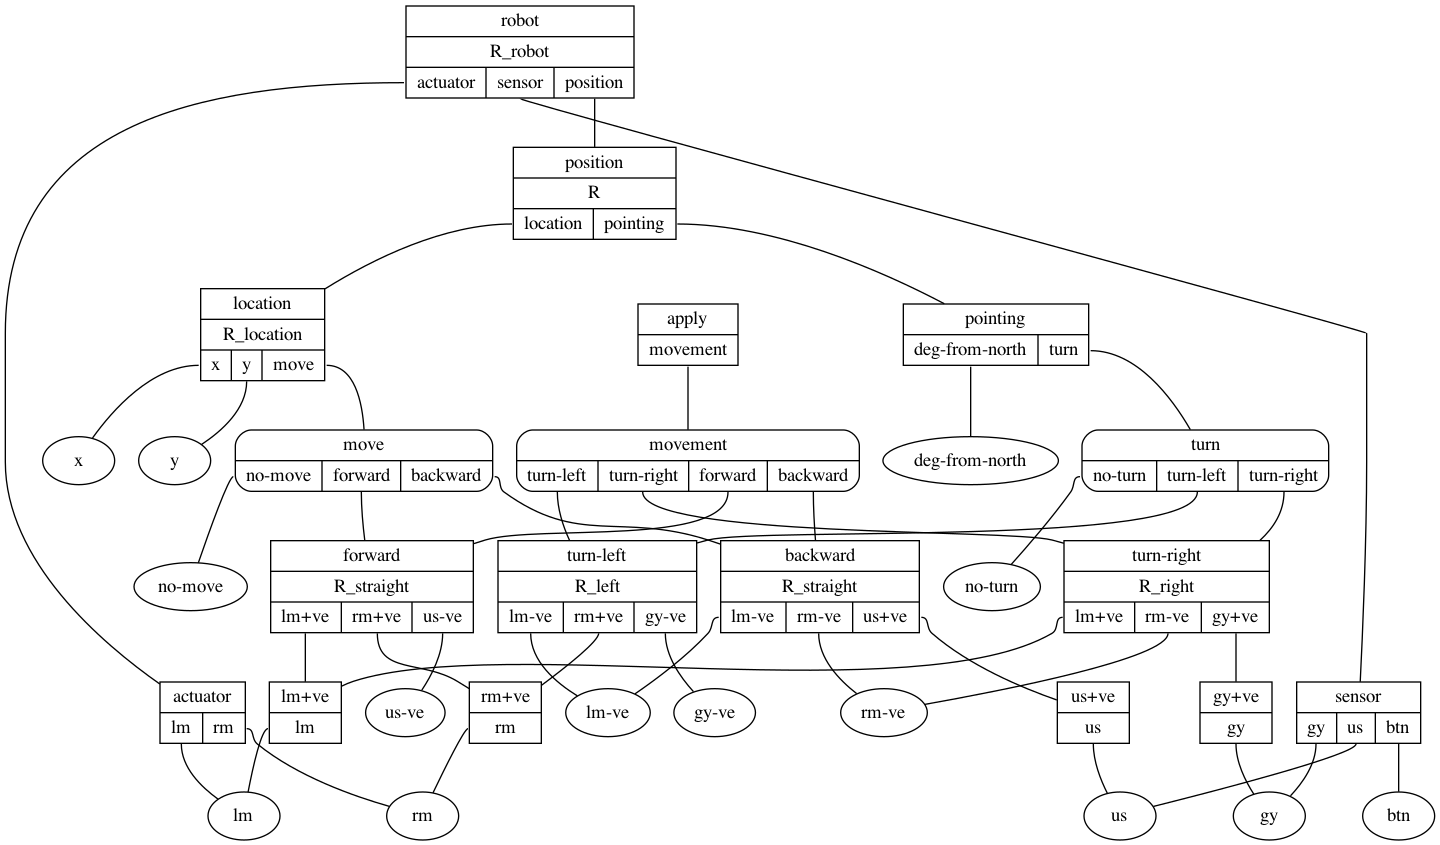

In [7]:
hn = Hypernetwork()
hn.union(robot_hn)
hn.union(pos_hn)
hn.union(movement_hn)

draw_hn(hn, fname="/tmp/robot-hn", view=True)
Image(filename='/tmp/robot-hn.png', width=1200, height=1200)

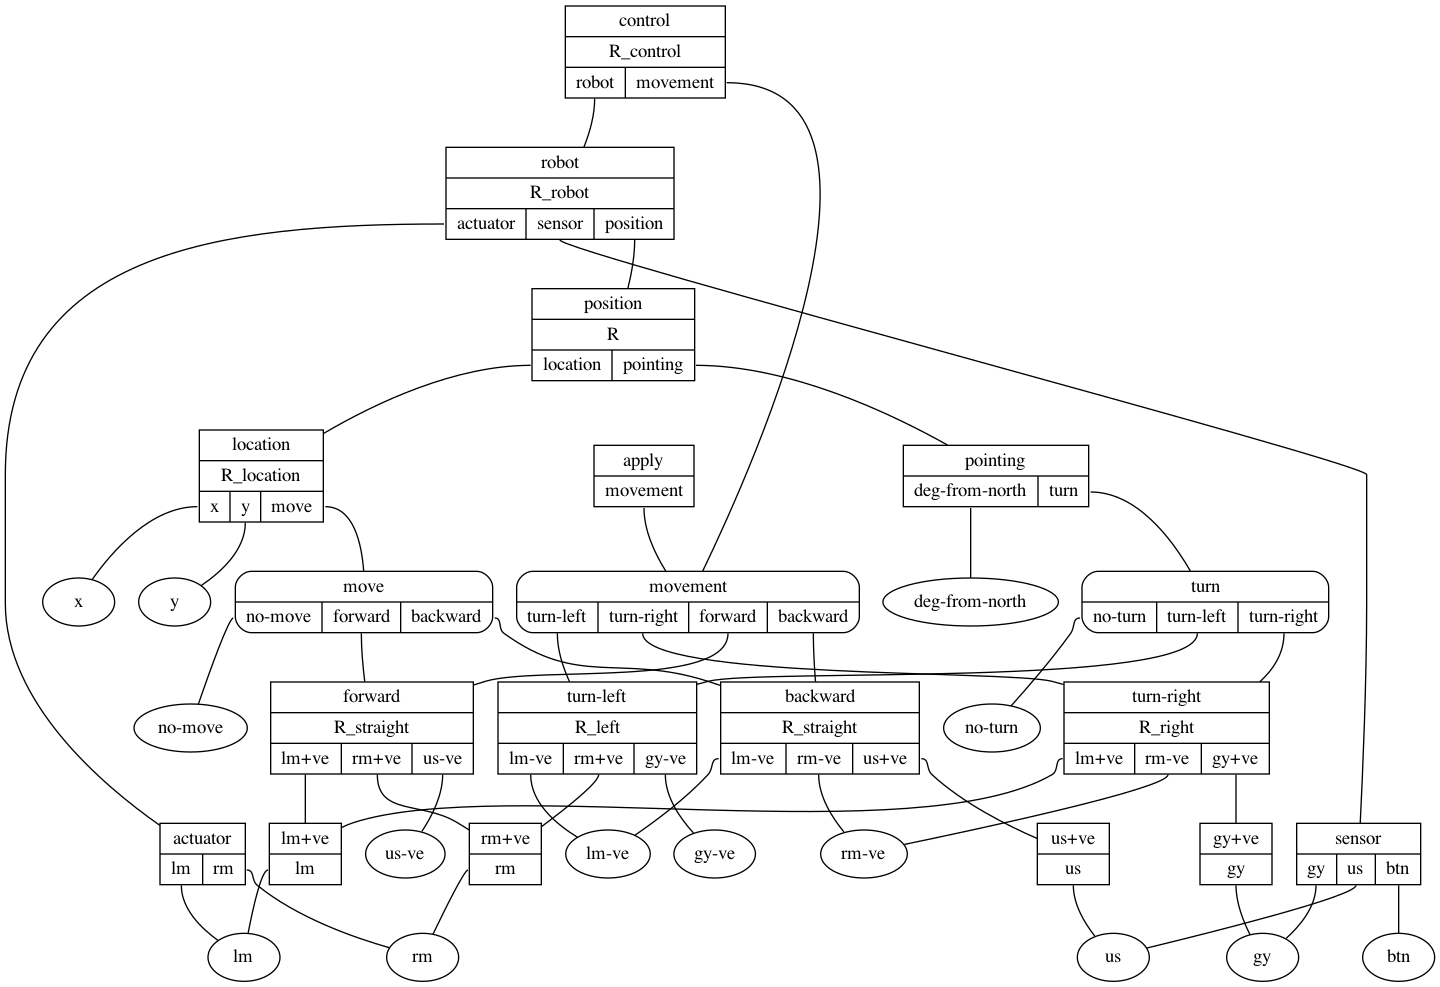

In [8]:
hn2 = Hypernetwork()

compile_hn(hn2, parser, """
    robot=U<actuator, sensor; R_robot>
    control=<robot, movement; R_control; psi-inv_move>
""")

hn.union(hn2)

draw_hn(hn, fname="/tmp/robot2", view=False)
Image(filename='/tmp/robot2.png', width=1200, height=1200)

In [9]:
def which()

SyntaxError: invalid syntax (<ipython-input-9-cb25a48d25d8>, line 1)

In [ ]:
print(hn.psi_invs)